# Telecommunication Customer Churn Prediction
This project aims to predict customer churn in a telecom company using machine learning. The model helps identify customers who are likely to leave, enabling proactive retention strategies.

## Objective
- Analyze customer data to understand churn behavior.
- Build and evaluate machine learning models for churn prediction.
- Deploy an interactive web app using Streamlit for real-time predictions.

## Dataset
**Source**: [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Features**:
- Customer demographics (gender, senior citizen, etc.)
- Account details (tenure, contract type, payment method)
- Service usage (monthly charges, total charges, etc.)
- Target variable: **Churn (Yes/No)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.duplicated().sum()

0

In [8]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [9]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


# Data Preprocessing
- Handle invalid values.
- Handle missing values.
- Convert categorical variables into numerical format:
One-hot encoding: > 2 categories.
Label encoding: <= 2 categories.
- Standardize numerical features.
- Split data into training (80%) and testing (20%).

In [10]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

In [11]:
X.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [12]:
X[X['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN


In [13]:
# Because of total charges depents on the tenure, so it would be 0 total charges if tenure is 0
X['TotalCharges'] = X['TotalCharges'].fillna(0)

In [14]:
# No phone service/No internet service == No
X['MultipleLines'] = X['MultipleLines'].replace('No phone service', 'No')
X['OnlineSecurity'] = X['OnlineSecurity'].replace('No internet service', 'No')
X['OnlineBackup'] = X['OnlineBackup'].replace('No internet service', 'No')
X['DeviceProtection'] = X['DeviceProtection'].replace('No internet service', 'No')
X['TechSupport'] = X['TechSupport'].replace('No internet service', 'No')
X['StreamingTV'] = X['StreamingTV'].replace('No internet service', 'No')
X['StreamingMovies'] = X['StreamingMovies'].replace('No internet service', 'No')

In [15]:
encoder = OrdinalEncoder()
features = X.columns.drop(['InternetService', 'Contract', 'PaymentMethod'])
for feature in features:
  if X[feature].dtype == 'object':
    X[feature] = encoder.fit_transform(X[[feature]])

In [16]:
for feature in X.columns:
  if X[feature].dtype == 'object':
    X = pd.get_dummies(X, columns=[feature])

In [17]:
X.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4577,0.0,1,1.0,0.0,62,1.0,1.0,1.0,0.0,1.0,...,False,True,False,False,True,False,False,False,True,False
6333,0.0,1,0.0,0.0,60,1.0,1.0,0.0,0.0,1.0,...,False,True,False,False,True,False,False,False,True,False
3494,0.0,0,1.0,1.0,9,1.0,1.0,0.0,0.0,0.0,...,False,True,False,True,False,False,True,False,False,False
6492,1.0,0,1.0,0.0,24,1.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,True,False,False,False,True
6384,0.0,0,1.0,0.0,10,1.0,0.0,0.0,0.0,0.0,...,False,False,True,False,True,False,False,False,False,True


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   float64
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   float64
 3   Dependents                               7043 non-null   float64
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   float64
 6   MultipleLines                            7043 non-null   float64
 7   OnlineSecurity                           7043 non-null   float64
 8   OnlineBackup                             7043 non-null   float64
 9   DeviceProtection                         7043 non-null   float64
 10  TechSupport                              7043 no

# Data Visualization

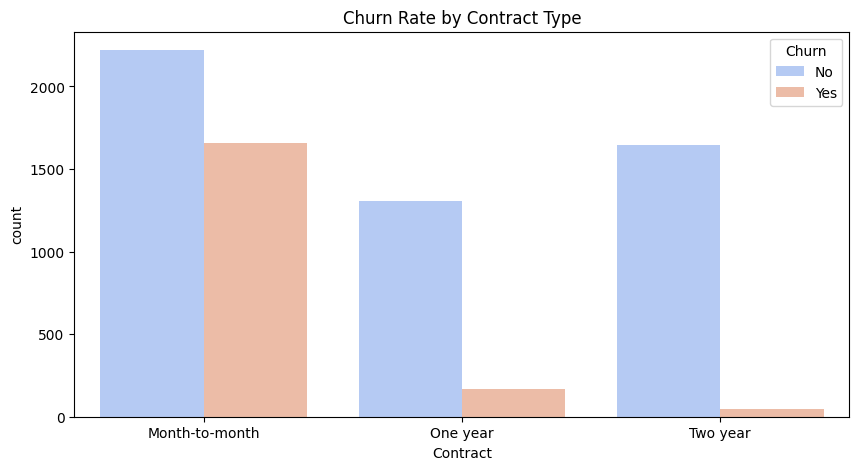

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.show()

<ipython-input-20-b6e55e6ae4bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="tenure", data=df, palette="coolwarm")


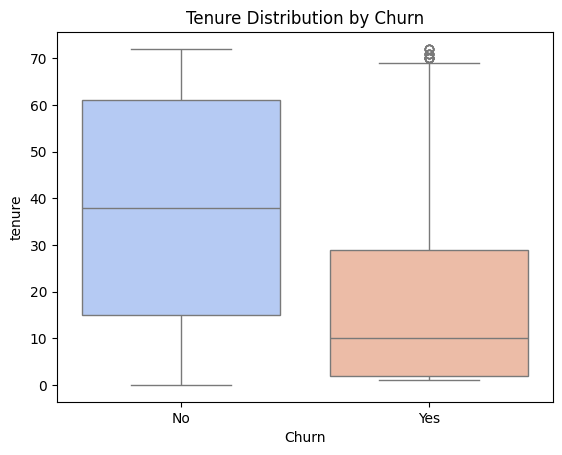

In [20]:
sns.boxplot(x="Churn", y="tenure", data=df, palette="coolwarm")
plt.title("Tenure Distribution by Churn")
plt.show()

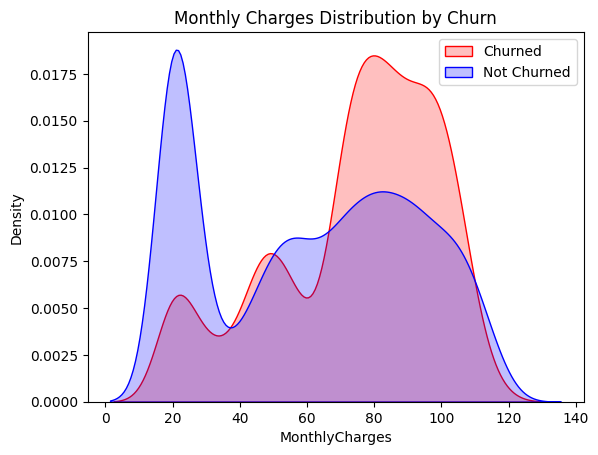

In [21]:
sns.kdeplot(df[df["Churn"] == "Yes"]["MonthlyCharges"], label="Churned", fill=True, color="red")
sns.kdeplot(df[df["Churn"] == "No"]["MonthlyCharges"], label="Not Churned", fill=True, color="blue")
plt.title("Monthly Charges Distribution by Churn")
plt.legend()
plt.show()

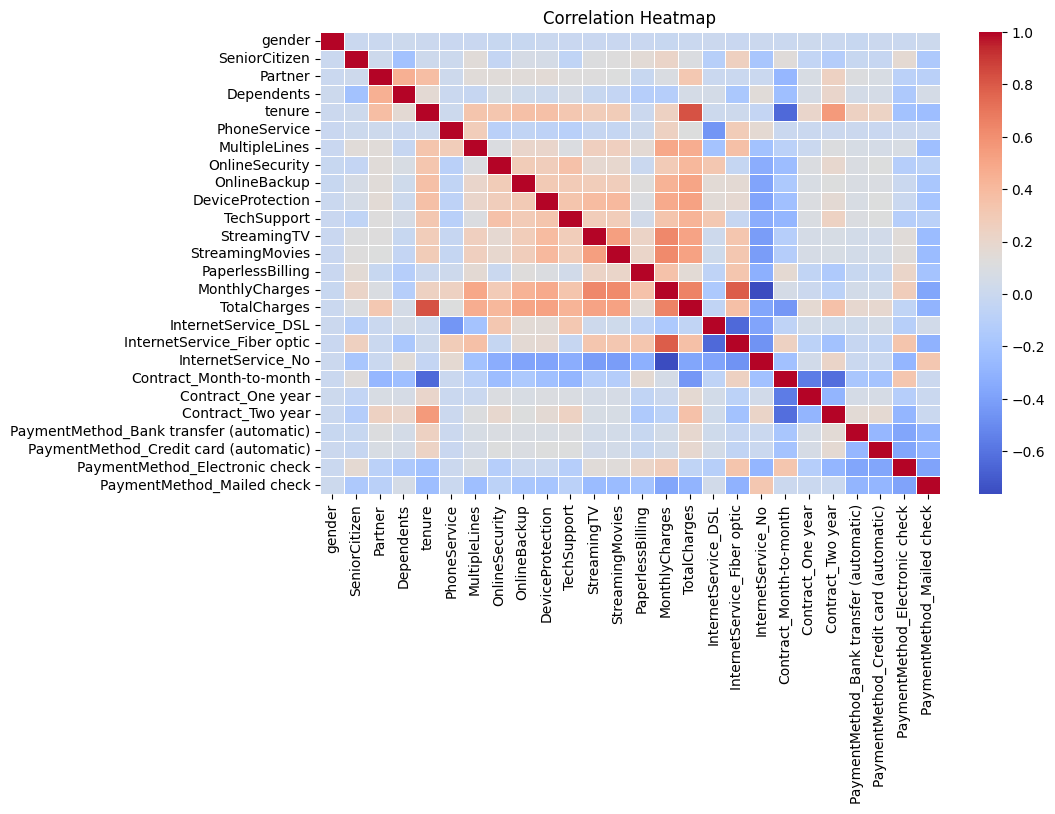

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Training Model
- Random Forest Classifier
- Logistic Regression
- Gradient Boosting
- K-Nearest Neighbor
- SVM
- Naive Bayes
- Decision Tree

In [23]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    roc_auc = roc_auc_score(y_test, y_prob)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

def train_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        print(f"Evaluating {name}...")
        results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
        print(f"{name} done.")

    results_df = pd.DataFrame(results).T
    results_df = results_df.sort_values(by='ROC AUC', ascending=False)

    print(results_df)

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
train_models(models, X_train, X_test, y_train, y_test)

Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression done.
Evaluating Decision Tree...
Decision Tree done.
Evaluating Random Forest...
Random Forest done.
Evaluating Gradient Boosting...
Gradient Boosting done.
Evaluating SVM...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM done.
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors done.
Evaluating Naive Bayes...
Naive Bayes done.
                     Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.816581   0.694030  0.582463  0.633371  0.860838
Gradient Boosting    0.797274   0.670391  0.501044  0.573477  0.856828
Naive Bayes          0.752413   0.529093  0.816284  0.642036  0.842871
Random Forest        0.791028   0.661808  0.473904  0.552311  0.837456
SVM                  0.727995   0.000000  0.000000  0.000000  0.804840
K-Nearest Neighbors  0.769449   0.598916  0.461378  0.521226  0.757714
Decision Tree        0.735378   0.513978  0.498956  0.506356  0.661219


## Standardization

In [27]:
scaler = StandardScaler()
X[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X[['MonthlyCharges', 'TotalCharges']])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
train_models(models, X_train, X_test, y_train, y_test)

Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression done.
Evaluating Decision Tree...
Decision Tree done.
Evaluating Random Forest...
Random Forest done.
Evaluating Gradient Boosting...
Gradient Boosting done.
Evaluating SVM...
SVM done.
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors done.
Evaluating Naive Bayes...
Naive Bayes done.
                     Accuracy  Precision    Recall  F1-score   ROC AUC
Logistic Regression  0.823279   0.691358  0.600536  0.642755  0.862434
Gradient Boosting    0.810504   0.677852  0.541555  0.602086  0.860389
Naive Bayes          0.755145   0.523891  0.823056  0.640250  0.850023
Random Forest        0.794890   0.647887  0.493298  0.560122  0.841349
SVM                  0.790632   0.678899  0.396783  0.500846  0.824504
K-Nearest Neighbors  0.752307   0.534091  0.504021  0.518621  0.782723
Decision Tree        0.740241   0.509383  0.509383  0.509383  0.668108


## Oversampling

In [30]:
# Oversampling
oversampler = RandomOverSampler(random_state=42)
X_ros, y_ros = oversampler.fit_resample(X, y)

In [31]:
# SMOTE oversampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [32]:
y_ros.value_counts()

,count
Churn,
No,5174
Yes,5174


In [33]:
y_smote.value_counts()

,count
Churn,
No,5174
Yes,5174


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [35]:
train_models(models, X_train, X_test, y_train, y_test)

Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression done.
Evaluating Decision Tree...
Decision Tree done.
Evaluating Random Forest...
Random Forest done.
Evaluating Gradient Boosting...
Gradient Boosting done.
Evaluating SVM...
SVM done.
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors done.
Evaluating Naive Bayes...
Naive Bayes done.
                     Accuracy  Precision    Recall  F1-score   ROC AUC
Gradient Boosting    0.859420   0.851577  0.875119  0.863188  0.938919
Random Forest        0.866667   0.877073  0.857007  0.866924  0.937603
Logistic Regression  0.825121   0.808625  0.857960  0.832562  0.899709
K-Nearest Neighbors  0.823188   0.766589  0.936130  0.842918  0.898022
SVM                  0.784058   0.758148  0.842707  0.798194  0.866390
Naive Bayes          0.773913   0.755497  0.818875  0.785910  0.853398
Decision Tree        0.805797   0.818092  0.793136  0.805421  0.806840


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [37]:
train_models(models, X_train, X_test, y_train, y_test)

Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression done.
Evaluating Decision Tree...
Decision Tree done.
Evaluating Random Forest...
Random Forest done.
Evaluating Gradient Boosting...
Gradient Boosting done.
Evaluating SVM...
SVM done.
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors done.
Evaluating Naive Bayes...
Naive Bayes done.
                     Accuracy  Precision    Recall  F1-score   ROC AUC
Random Forest        0.897585   0.860465  0.952336  0.904072  0.967796
Decision Tree        0.884058   0.836243  0.959009  0.893428  0.884758
Gradient Boosting    0.798551   0.772414  0.854147  0.811227  0.874407
K-Nearest Neighbors  0.782609   0.748136  0.860820  0.800532  0.863316
Logistic Regression  0.785990   0.769094  0.825548  0.796322  0.862536
SVM                  0.773913   0.755497  0.818875  0.785910  0.850248
Naive Bayes          0.770048   0.746770  0.826501  0.784615  0.847416


In [38]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

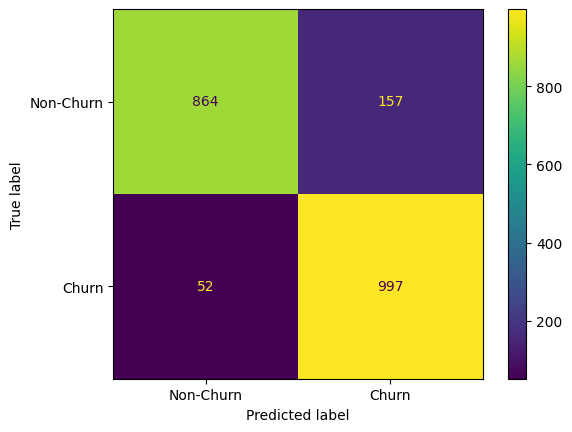

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churn', 'Churn']).plot()
plt.show()

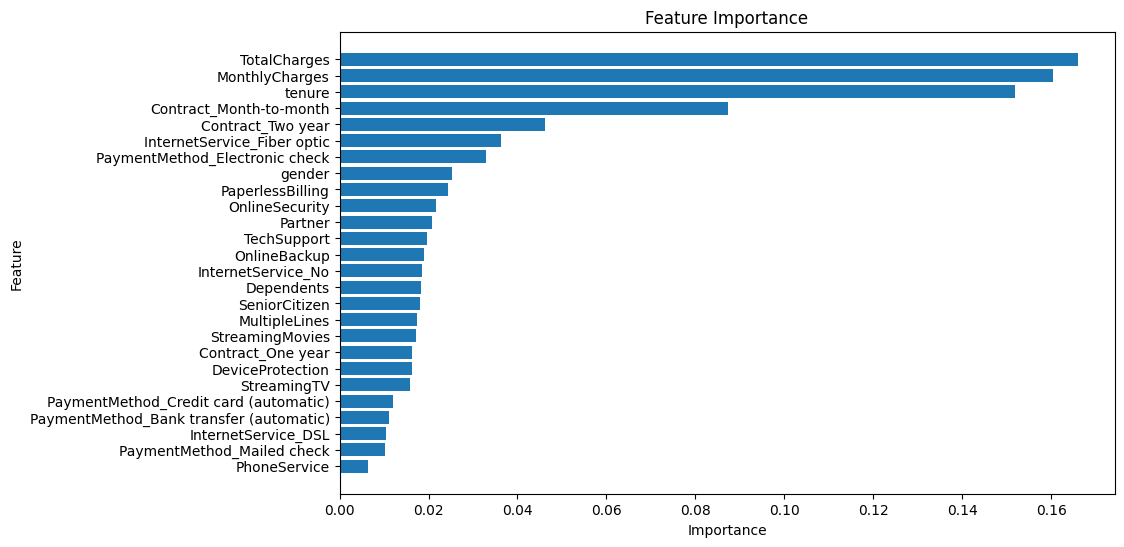

In [40]:
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel('Importance')
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [41]:
import joblib
joblib.dump(rf_model, 'random_forest_churn_model.pkl')

['random_forest_churn_model.pkl']